**BIKE SHARING ASSIGNMENT LINEAR REGRESSION**

**Problem Statement:**

*   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands





**What we should do above dataset:**


*   Create a linear model that describe the effect on various features on price.
*   Need to give a final verdict on variables to company to boost their business in the market.



**READING AND UNDERSTANDING THE DATA**

In [247]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#importing numpy and pandas and read the dataset
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',500)

In [248]:
bbikes = pd.read_csv('/content/drive/MyDrive/day.csv')
bbikes.head()
#check the head of dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [249]:
bbikes.shape
#identify the no of rows and columns in the dataset

(730, 16)

there are total 730 initial rows and 16 initial columns in the data set

In [250]:
#identify the summary of numerical columns
bbikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [251]:
#identify the null values, data type etc in dataset
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [252]:
#checking missing values count
bbikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [253]:
bbikes.duplicated().sum()

0

There are no missing values in the dataset

In [254]:
#from the given data set we can see that 'instant' is an index column so we can drop it

bbikes.drop(['instant'], axis=1, inplace=True)

In [255]:
bbikes.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [256]:
bbikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [257]:
#by observing we can see that dteday and yr month are having same data so we can drop dteday
#casual and registered columns combined equal to cnt so drop these two columns

bbikes.drop(['dteday'], axis=1, inplace= True)
bbikes.drop(['casual'], axis=1, inplace = True)
bbikes.drop(['registered'], axis=1, inplace = True)
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


- Categorical variables: 'season', 'yr','mnth','holiday','weekday','workingday','weathersit'

- :Numerical variables: 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'atemp'


In [258]:
bbikes.groupby("weekday").sum()["workingday"]

weekday
0      0
1    105
2    100
3     93
4    103
5    103
6      0
Name: workingday, dtype: int64

Here we can come to the point that Sunday is encoded as 0 and Saturday is encoded as 6

In [259]:
bbikes.shape

(730, 12)

In [260]:
bbikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [261]:
#After looking at the columns like 'temp','hum','windspeed'and'atemp' we need to convert them into 'int' datatype
# coverting columns float type to integer type

bbikes['temp'] = bbikes['temp'].astype('int')
bbikes['hum'] = bbikes['hum'].astype('int')
bbikes['atemp'] = bbikes['atemp'].astype('int')
bbikes['windspeed'] = bbikes['windspeed'].astype('int')
bbikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14,18,80,10,985
1,1,0,1,0,2,1,2,14,17,69,16,801
2,1,0,1,0,3,1,1,8,9,43,16,1349
3,1,0,1,0,4,1,1,8,10,59,10,1562
4,1,0,1,0,5,1,1,9,11,43,12,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10,11,65,23,2114
726,1,1,12,0,6,0,2,10,12,59,10,3095
727,1,1,12,0,0,0,2,10,12,75,8,1341
728,1,1,12,0,1,1,1,10,11,48,23,1796


In [262]:
#once check all the data types of the columns

bbikes.dtypes

season        int64
yr            int64
mnth          int64
holiday       int64
weekday       int64
workingday    int64
weathersit    int64
temp          int64
atemp         int64
hum           int64
windspeed     int64
cnt           int64
dtype: object

**Step 2:
 Visualising the Data**

1. we need to perform EDA to understand the relation between variables
2. We need to identify the variables which are having strong association with the outcome variable.
3. we need to identify the highest correlation with the target variable 'cnt'


In [263]:
# Import al the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns


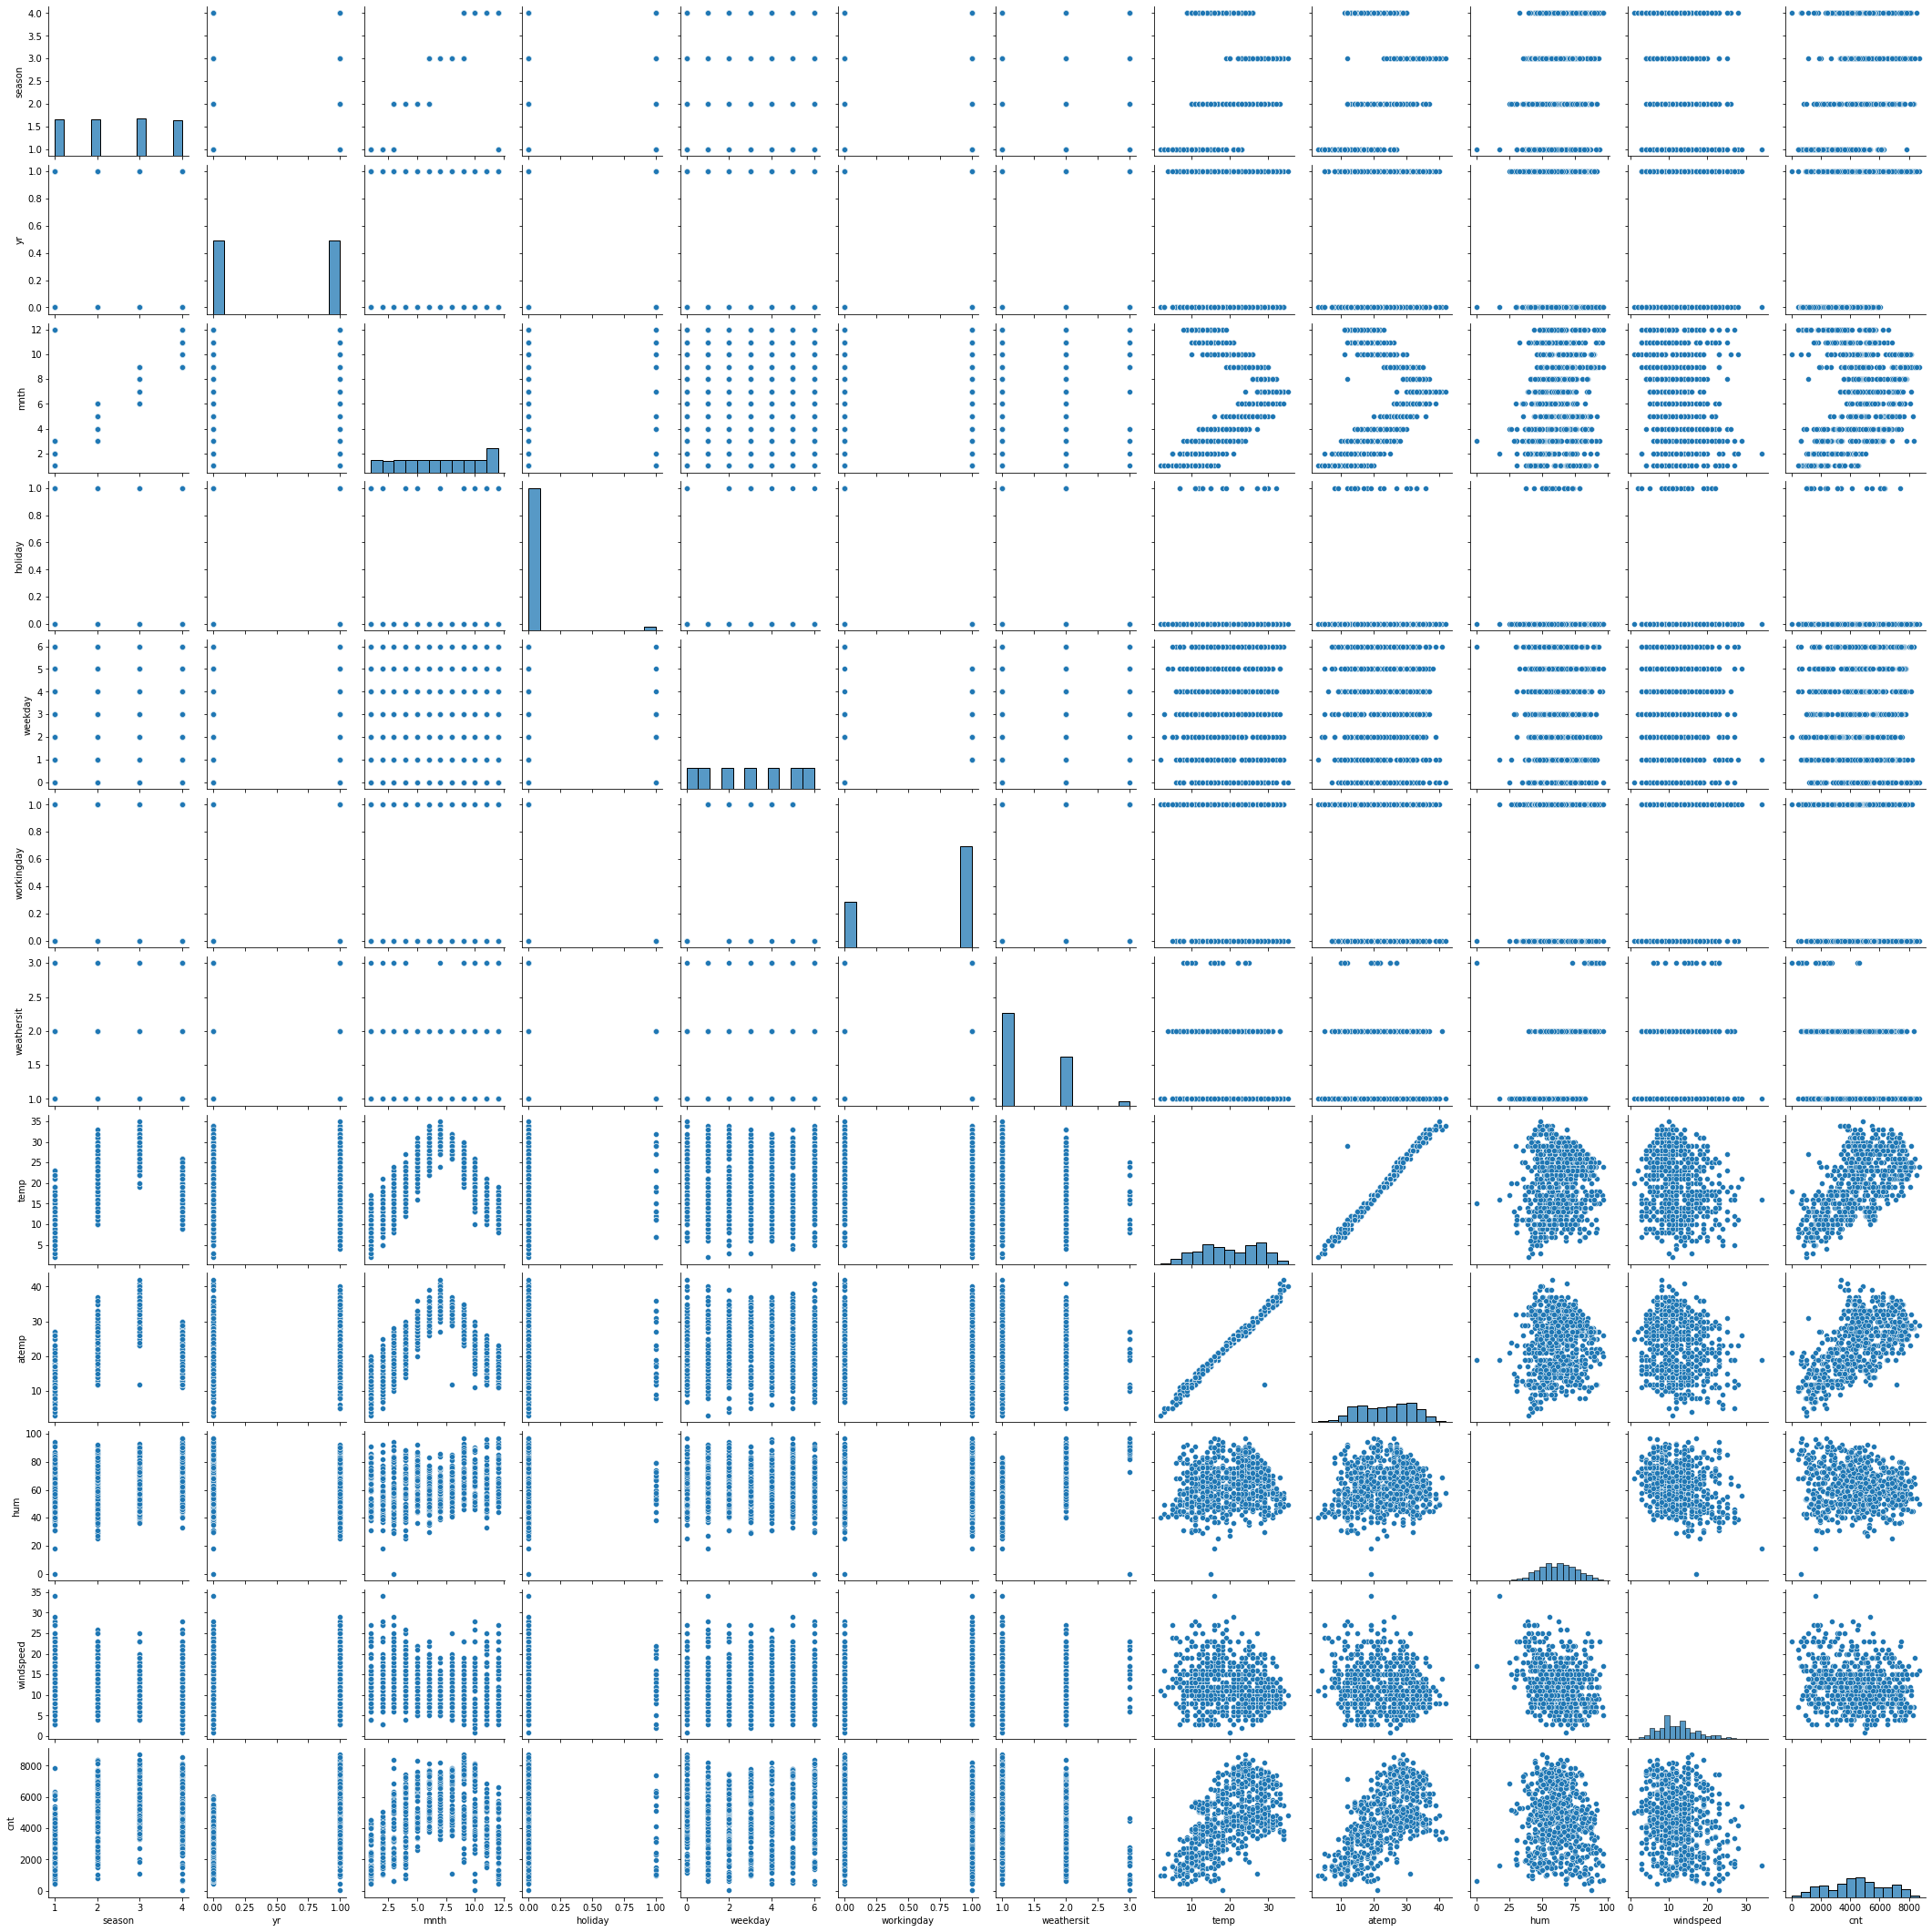

In [264]:
# we will make a pair plot of all the numerical variables

sns.pairplot(bbikes)
plt.show()

After performing the pairplot to all the variables in the remaining dataset we observe that 'temp','hum', 'atemp','casual','registered' and 'windspeed' are having a strong association with target variable 'cnt'

In [265]:
# Checking the correlation between variables

bbikes_corr = bbikes.corr()
bbikes_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.334818,0.342186,0.210081,-0.228318,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.049118,0.046357,-0.112018,-0.013196,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.220475,0.226128,0.226726,-0.204921,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.027311,-0.032703,-0.015599,0.010227,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.043519,0.036773,0.007655,-0.019041,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.003542,0.011231,0.053609,-0.005457,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.118780,-0.120729,0.590318,0.037450,-0.295929
temp,3.348178e-01,4.911805e-02,2.204748e-01,-0.027311,0.043519,0.003542,-0.118780,1.000000,0.990571,0.129839,-0.156321,0.626290
atemp,3.421857e-01,4.635730e-02,2.261284e-01,-0.032703,0.036773,0.011231,-0.120729,0.990571,1.000000,0.142488,-0.182824,0.629747
hum,2.100813e-01,-1.120177e-01,2.267259e-01,-0.015599,0.007655,0.053609,0.590318,0.129839,0.142488,1.000000,-0.252148,-0.098060


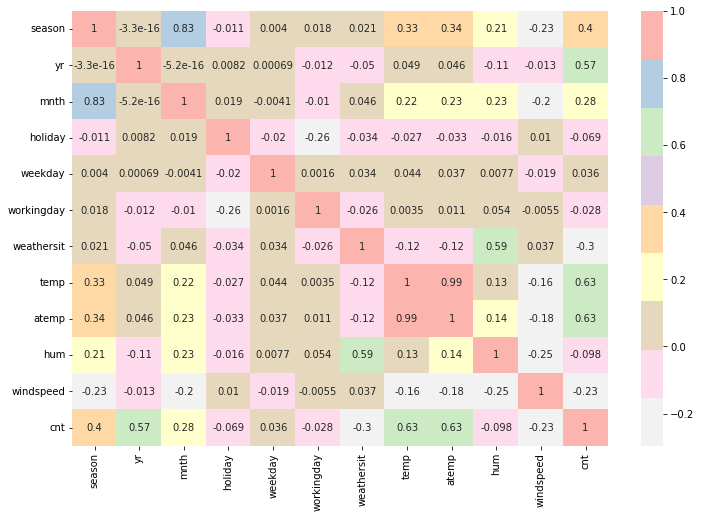

In [266]:
# Here we are observing the correlation between the variables by plotting heatmap

plt.figure(figsize = (12,8))
sns.heatmap(bbikes_corr, annot=True,cmap= "Pastel1_r")
plt.show()

Here we can observe that temp,atemp,casual,registered variables are strongly correlated to 'cnt' variable.

But here we can see that the dataset has some variables that are not required and we need to drop.

In [267]:
bbikes.shape

(730, 12)

In [268]:
#correlation between temp and atemp is 0.99 and which is almost equal to 1

# we will drop the 'atemp' and consider 'temp'

bbikes.drop(['atemp'], axis=1, inplace= True)
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14,80,10,985
1,1,0,1,0,2,1,2,14,69,16,801
2,1,0,1,0,3,1,1,8,43,16,1349
3,1,0,1,0,4,1,1,8,59,10,1562
4,1,0,1,0,5,1,1,9,43,12,1600
5,1,0,1,0,6,0,1,8,51,6,1606
6,1,0,1,0,0,0,2,8,49,11,1510
7,1,0,1,0,1,1,2,6,53,17,959
8,1,0,1,0,2,1,1,5,43,24,822
9,1,0,1,0,3,1,1,6,48,14,1321


In [269]:
bbikes.shape
#final columns we are having in the dataset

(730, 11)

Visualising the categorical variables

In [270]:
# From the above data we can see that :  season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
# we will replace season, weekday and weathersit with appropriate values

#season with appropriate values

bbikes.season = bbikes.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14,80,10,985
1,spring,0,1,0,2,1,2,14,69,16,801
2,spring,0,1,0,3,1,1,8,43,16,1349
3,spring,0,1,0,4,1,1,8,59,10,1562
4,spring,0,1,0,5,1,1,9,43,12,1600
5,spring,0,1,0,6,0,1,8,51,6,1606
6,spring,0,1,0,0,0,2,8,49,11,1510
7,spring,0,1,0,1,1,2,6,53,17,959
8,spring,0,1,0,2,1,1,5,43,24,822
9,spring,0,1,0,3,1,1,6,48,14,1321


In [271]:
#map weekday with appropriate values

bbikes.weekday = bbikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,Mon,1,2,14,80,10,985
1,spring,0,1,0,Tue,1,2,14,69,16,801
2,spring,0,1,0,Wed,1,1,8,43,16,1349
3,spring,0,1,0,Thu,1,1,8,59,10,1562
4,spring,0,1,0,Fri,1,1,9,43,12,1600
5,spring,0,1,0,Sat,0,1,8,51,6,1606
6,spring,0,1,0,Sun,0,2,8,49,11,1510
7,spring,0,1,0,Mon,1,2,6,53,17,959
8,spring,0,1,0,Tue,1,1,5,43,24,822
9,spring,0,1,0,Wed,1,1,6,48,14,1321


In [272]:
#mapped mnth column with appropriate values

bbikes.mnth = bbikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
                               9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,2,14,80,10,985
1,spring,0,Jan,0,Tue,1,2,14,69,16,801
2,spring,0,Jan,0,Wed,1,1,8,43,16,1349
3,spring,0,Jan,0,Thu,1,1,8,59,10,1562
4,spring,0,Jan,0,Fri,1,1,9,43,12,1600
5,spring,0,Jan,0,Sat,0,1,8,51,6,1606
6,spring,0,Jan,0,Sun,0,2,8,49,11,1510
7,spring,0,Jan,0,Mon,1,2,6,53,17,959
8,spring,0,Jan,0,Tue,1,1,5,43,24,822
9,spring,0,Jan,0,Wed,1,1,6,48,14,1321


In [273]:
#mapped weathersit column to appropriate values

bbikes.weathersit = bbikes.weathersit.map({1:'Clear',2:'Mist',3:'Light snow',4:'Heavy Rain'})
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14,80,10,985
1,spring,0,Jan,0,Tue,1,Mist,14,69,16,801
2,spring,0,Jan,0,Wed,1,Clear,8,43,16,1349
3,spring,0,Jan,0,Thu,1,Clear,8,59,10,1562
4,spring,0,Jan,0,Fri,1,Clear,9,43,12,1600
5,spring,0,Jan,0,Sat,0,Clear,8,51,6,1606
6,spring,0,Jan,0,Sun,0,Mist,8,49,11,1510
7,spring,0,Jan,0,Mon,1,Mist,6,53,17,959
8,spring,0,Jan,0,Tue,1,Clear,5,43,24,822
9,spring,0,Jan,0,Wed,1,Clear,6,48,14,1321


In [274]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   yr          730 non-null    int64 
 2   mnth        730 non-null    object
 3   holiday     730 non-null    int64 
 4   weekday     730 non-null    object
 5   workingday  730 non-null    int64 
 6   weathersit  730 non-null    object
 7   temp        730 non-null    int64 
 8   hum         730 non-null    int64 
 9   windspeed   730 non-null    int64 
 10  cnt         730 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 62.9+ KB


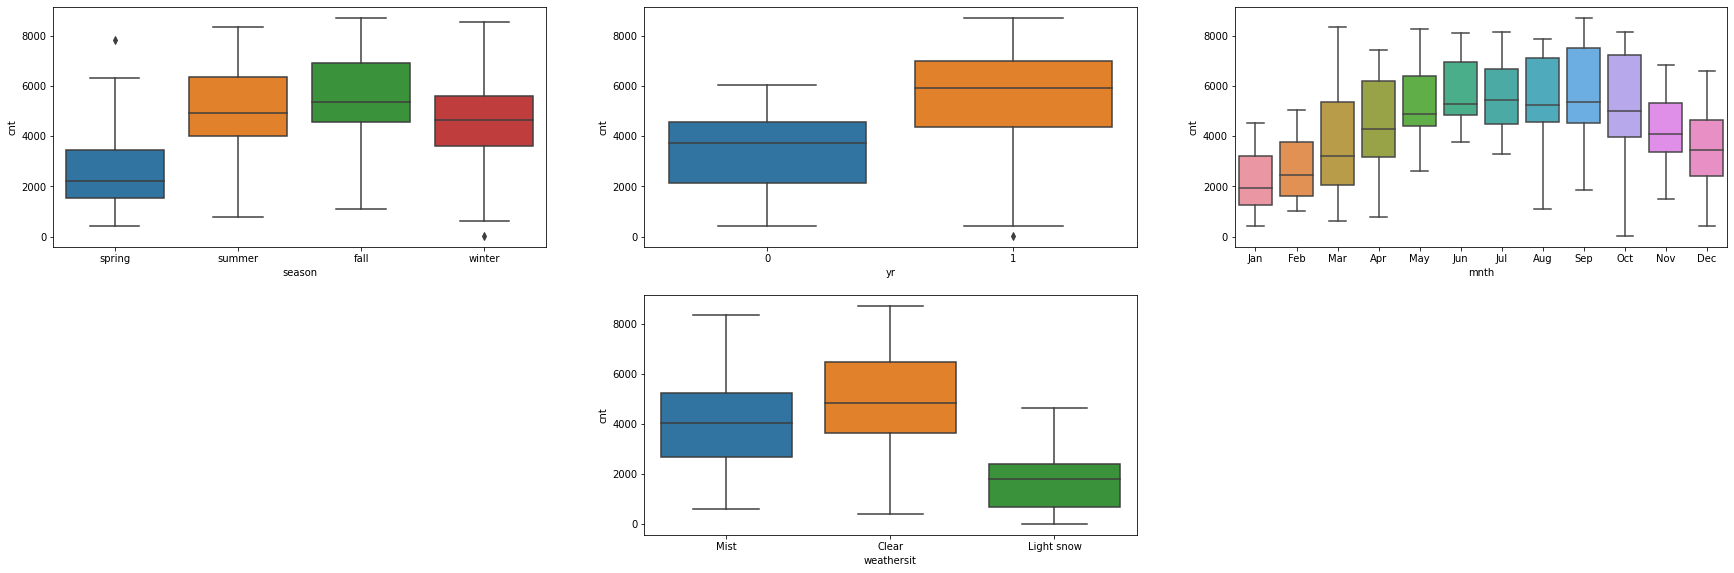

In [275]:
## Visualising the data using boxplot

plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bbikes)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bbikes)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bbikes)

plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bbikes)

plt.show()



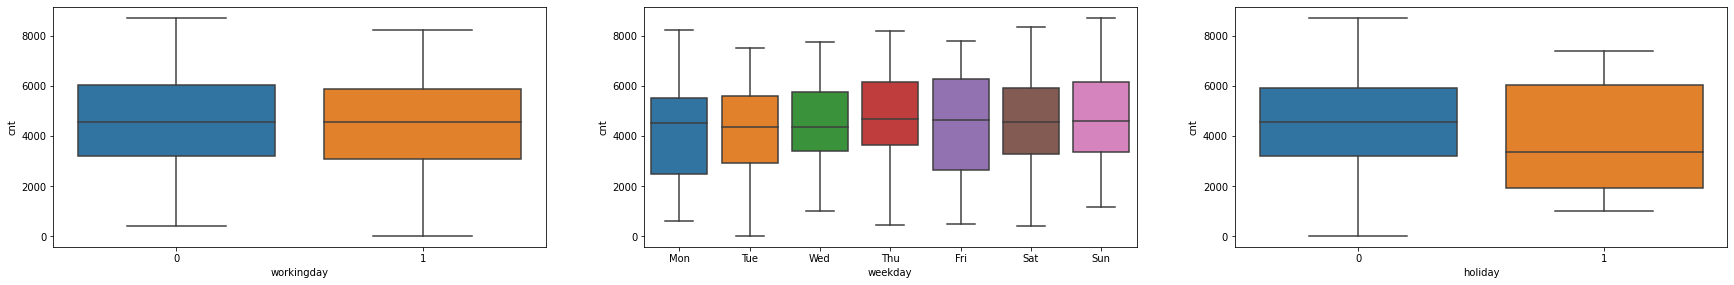

In [276]:
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = bbikes)

plt.subplot(3,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bbikes)

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bbikes)


plt.show()

**Comment**:
From the above boxplot we observe the below points the demand for Bike Rentals are more:
1. in fall season followed by summer season
2. in the year 2019 compared to 2018
3. in partly cloudy weather 
4. on saturday,followed by wednesday and thursday

We will perform  Univariate Analysis on the variables with target variable 'cnt'

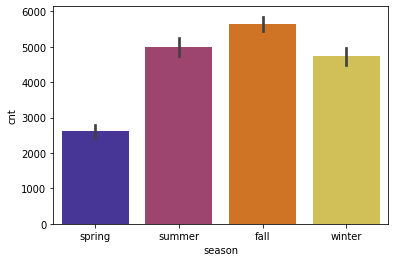

In [277]:
# Relation between season and cnt of bike rentals

sns.barplot('season','cnt',data = bbikes, palette = "CMRmap")
plt.show()

***Bike rentals are more in fall season followed by summer season***

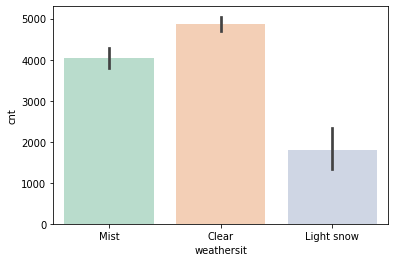

In [278]:
# Relation between waethersit and cnt of bike rentals

sns.barplot('weathersit','cnt',data = bbikes, palette = "Pastel2")
plt.show()

***Bike rentals are more in partly cloudy weather***

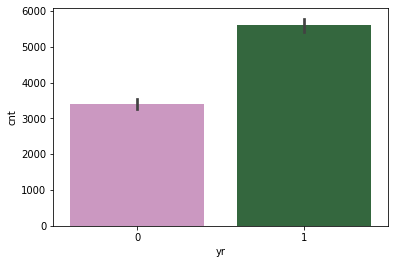

In [279]:
# Relation between year and cnt of bike rentals

sns.barplot('yr','cnt',data = bbikes, palette = "cubehelix_r")
plt.show()

***Bike rentals are more in 2019 than in 2018***

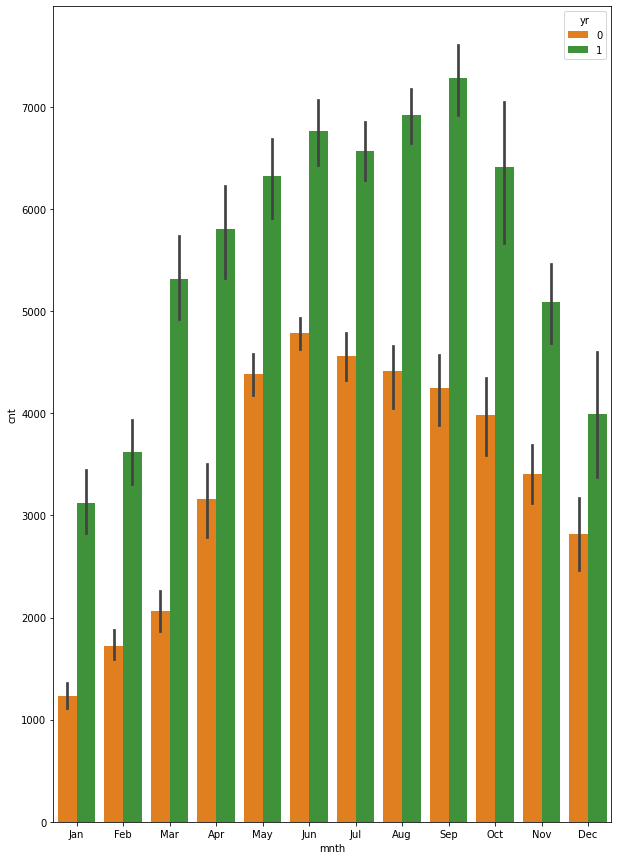

In [280]:
# Relation between month and cnt of bike rentals
plt.figure(figsize=(10,15))
sns.barplot('mnth','cnt',hue = 'yr',data = bbikes, palette = "Paired_r")
plt.show()

***Bike Rentals are more in september, august ,june,july in 2019
and june,july and may in 2018***


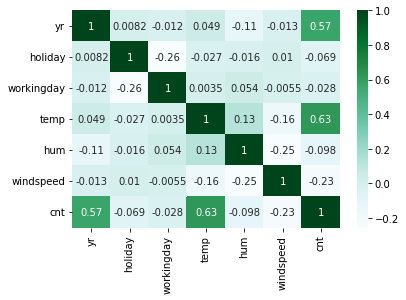

In [281]:
#correlation between Numerical variables usinh heat map

sns.heatmap(bbikes.corr(), annot=True, cmap='BuGn')
plt.show()

- Positive correlation observed between cnt and temo 0.63
- Negative correlation between cnt with hum and windspeed

**Data Preparation for Linear Regression**

In [282]:
bbikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14,80,10,985
1,spring,0,Jan,0,Tue,1,Mist,14,69,16,801
2,spring,0,Jan,0,Wed,1,Clear,8,43,16,1349
3,spring,0,Jan,0,Thu,1,Clear,8,59,10,1562
4,spring,0,Jan,0,Fri,1,Clear,9,43,12,1600
5,spring,0,Jan,0,Sat,0,Clear,8,51,6,1606
6,spring,0,Jan,0,Sun,0,Mist,8,49,11,1510
7,spring,0,Jan,0,Mon,1,Mist,6,53,17,959
8,spring,0,Jan,0,Tue,1,Clear,5,43,24,822
9,spring,0,Jan,0,Wed,1,Clear,6,48,14,1321


**Creating Dummy variables for categorical data**
we need to create dummy variables for the following columns

*   season
*   mnth
*   weekday
*   weathersit






In [283]:
dum = pd.get_dummies(bbikes[['season','mnth','weekday','weathersit']], drop_first = True)
dum.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [284]:
bbikes = pd.concat([bbikes,dum], axis =1)
bbikes = bbikes.drop(['season','mnth','weekday','weathersit'], axis =1)
bbikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,0,0,1,14,80,10,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14,69,16,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8,43,16,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8,59,10,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9,43,12,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [285]:
#moving the 'cnt' to the end for easier identification
first_col = bbikes.pop('cnt')
bbikes['cnt'] = first_col

In [286]:
bbikes.head(10)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
0,0,0,1,14,80,10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,985
1,0,0,1,14,69,16,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,801
2,0,0,1,8,43,16,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1349
3,0,0,1,8,59,10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1562
4,0,0,1,9,43,12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1600
5,0,0,0,8,51,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1606
6,0,0,0,8,49,11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1510
7,0,0,1,6,53,17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,959
8,0,0,1,5,43,24,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,822
9,0,0,1,6,48,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1321


In [287]:
bbikes.shape

(730, 29)

**Splitting the data into Training and testing Set**

In [288]:
# The very first step for regression is to perform train-test split
#import required libraries


from sklearn.model_selection import train_test_split

#divide dataset into two : Train Dataset and Test Dataset, the two sets must have the same rows respectively

np.random.seed(0)
bbikes_train, bbikes_test = train_test_split(bbikes, train_size= 0.7, test_size = 0.3, random_state = 100)

#shape of train data
print(bbikes_train.shape)
#shape of test data
print(bbikes_test.shape)


(510, 29)
(219, 29)


In [289]:
#printing the head of train dataset
bbikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
653,1,0,1,19,55,12,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,7534
576,1,0,1,29,70,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7216
426,1,0,0,16,62,10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,4066
728,1,0,1,10,48,23,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1796
482,1,0,0,15,48,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4220


In [290]:
#printing the head of test dataset
bbikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
184,0,1,0,29,63,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6043
535,1,0,1,32,59,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,6211
299,0,0,0,19,81,13,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2659
221,0,0,1,31,42,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4780
152,0,0,0,29,30,19,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4968


In [291]:
bbikes_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light snow', 'weathersit_Mist', 'cnt'],
      dtype='object')

**Rescaling the Features**


*   We observe that temp,hum,windspeed,cnt are having highest values compared to other columns. 
*   We will scale the only numeric features, excluidng categorical features encoded with 0 and 1.
*   Here we will use the MinMax Scaling



In [292]:
#import required libraries

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#list of numerical variables
num_var = ['temp','hum','windspeed','cnt']

bbikes_train[num_var] = scaler.fit_transform(bbikes_train[num_var])

In [293]:
bbikes_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
653,1,0,1,0.515152,0.567010,0.31250,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.864243
576,1,0,1,0.818182,0.721649,0.28125,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.827658
426,1,0,0,0.424242,0.639175,0.25000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.465255
728,1,0,1,0.242424,0.494845,0.65625,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.204096
482,1,0,0,0.393939,0.494845,0.18750,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.482973
111,0,0,0,0.333333,0.742268,0.37500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.191095
580,1,0,0,0.909091,0.628866,0.46875,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.782559
500,1,0,1,0.727273,0.711340,0.18750,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.851588
479,1,0,1,0.515152,0.432990,0.15625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.710308
472,1,0,1,0.484848,0.577320,0.28125,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.499885


In [294]:
#checking the variables(after scaling)
bbikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.533393,0.645704,0.322794,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.513620
std,0.500429,0.157763,0.453386,0.225123,0.145907,0.165479,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.536082,0.218750,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356420
50%,1.000000,0.000000,1.000000,0.545455,0.649485,0.312500,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518638
75%,1.000000,0.000000,1.000000,0.727273,0.752577,0.406250,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Building the Model**

- Since the number of columns are 29 which are manageble, we will build a model with all the columns present and then keep removing the columns based on statistical significance and co-linearity.
- We will stop the process until we find no improvement in R2 value or all variables are with low VIF

In [295]:
#divide the data into x_train and y_train
#Y train
y_train = bbikes_train.pop('cnt')
#X train
x_train = bbikes_train

In [296]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist
653,1,0,1,0.515152,0.567010,0.31250,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.818182,0.721649,0.28125,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.424242,0.639175,0.25000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.242424,0.494845,0.65625,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.393939,0.494845,0.18750,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [297]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [298]:
x_train.dtypes

yr                         int64
holiday                    int64
workingday                 int64
temp                     float64
hum                      float64
windspeed                float64
season_spring              uint8
season_summer              uint8
season_winter              uint8
mnth_Aug                   uint8
mnth_Dec                   uint8
mnth_Feb                   uint8
mnth_Jan                   uint8
mnth_Jul                   uint8
mnth_Jun                   uint8
mnth_Mar                   uint8
mnth_May                   uint8
mnth_Nov                   uint8
mnth_Oct                   uint8
mnth_Sep                   uint8
weekday_Mon                uint8
weekday_Sat                uint8
weekday_Sun                uint8
weekday_Thu                uint8
weekday_Tue                uint8
weekday_Wed                uint8
weathersit_Light snow      uint8
weathersit_Mist            uint8
dtype: object

we will be using the Linear Regression function from SciKit Learn for its compatibility with RFE(utility from sklearn)


In [299]:
#importing RFE and Linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [300]:
#we will use RFE approach 
lr = LinearRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr)
rfe = rfe.fit(x_train, y_train)

In [301]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [302]:
#collecting all columns as ranked by RFE

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [303]:
x_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

**Building model using statsmodel**

In [304]:
#creating x_test dataframe with RFE selected variable
x_train_rfe = x_train[col]

In [305]:
#importing library
import statsmodels.api as sm

#adding a constant variable
x_train_rfe = sm.add_constant(x_train_rfe)

#running linear model 1
lr_1 = sm.OLS(y_train,x_train_rfe).fit()
#printing summary of linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          1.91e-188
Time:                        16:40:27   Log-Likelihood:                 510.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     495   BIC:                            -926.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [306]:
#importing libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [307]:
#checking VIF(VARIANCE INFLATION FACTOR)

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF']= [variance_inflation_factor(x_train_rfe.values,i)for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.30
3,temp,3.46
6,season_spring,2.74
7,season_winter,2.34
4,hum,1.91
11,mnth_Nov,1.70
9,mnth_Jan,1.64
14,weathersit_Mist,1.56
8,mnth_Dec,1.45
10,mnth_Jul,1.31


In [308]:
x_train_lg = x_train_rfe.drop(['temp'], axis =1)

In [309]:
x_train_lg.shape

(510, 14)

In [310]:
x_train_lg.columns

Index(['const', 'yr', 'holiday', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [311]:
#adding a constant variable
x_train_df = sm.add_constant(x_train_lg)

#running linear model 1
lr_2 = sm.OLS(y_train,x_train_df).fit()
#printing summary of linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          7.75e-158
Time:                        16:40:27   Log-Likelihood:                 434.57
No. Observations:                 510   AIC:                            -841.1
Df Residuals:                     496   BIC:                            -781.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

We observed that 'season_winter' is having highest p-value i,e., 0.624. so we need to drop that column for better model

In [312]:
x_train_lg = x_train_lg.drop(["season_winter"], axis =1)

In [313]:
x_train_lg.columns

Index(['const', 'yr', 'holiday', 'hum', 'windspeed', 'season_spring',
       'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [314]:
x_train_lg.shape

(510, 13)

In [315]:
#adding a constant variable
x_train_df = sm.add_constant(x_train_lg)

#running linear model 1
lr_3 = sm.OLS(y_train,x_train_df).fit()
#printing summary of linear model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          6.88e-159
Time:                        16:40:27   Log-Likelihood:                 434.45
No. Observations:                 510   AIC:                            -842.9
Df Residuals:                     497   BIC:                            -787.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

We observed that 'hum' is having highest p-value i,e., 0.540. so we need to drop that column for better model

In [316]:
x_train_lg = x_train_lg.drop(["hum"], axis =1)

In [317]:
x_train_lg.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'season_spring', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Light snow',
       'weathersit_Mist'],
      dtype='object')

In [318]:
x_train_lg.shape

(510, 12)

In [319]:
#adding a constant variable
x_train_df = sm.add_constant(x_train_lg)

#running linear model 1
lr_4 = sm.OLS(y_train,x_train_df).fit()
#printing summary of linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          6.24e-160
Time:                        16:40:27   Log-Likelihood:                 434.26
No. Observations:                 510   AIC:                            -844.5
Df Residuals:                     498   BIC:                            -793.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

We observed that 'month_jul' is having highest p-value i,e., 0.492. so we need to drop that column for better model

In [320]:
x_train_lg = x_train_lg.drop(["mnth_Jul"], axis =1)

In [321]:
x_train_lg.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'season_spring', 'mnth_Dec',
       'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'weathersit_Light snow',
       'weathersit_Mist'],
      dtype='object')

In [322]:
x_train_lg.shape

(510, 11)

In [323]:
#adding a constant variable
x_train_df = sm.add_constant(x_train_lg)

#running linear model 5
lr_5 = sm.OLS(y_train,x_train_df).fit()
#printing summary of linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          5.65e-161
Time:                        16:40:27   Log-Likelihood:                 434.02
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

In [324]:
x_train_lg = x_train_lg.drop(["windspeed"], axis =1)

In [325]:
#adding a constant variable
x_train_df = sm.add_constant(x_train_lg)

#running linear model 6
lr_6 = sm.OLS(y_train,x_train_df).fit()
#printing summary of linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          3.39e-151
Time:                        16:40:27   Log-Likelihood:                 408.20
No. Observations:                 510   AIC:                            -796.4
Df Residuals:                     500   BIC:                            -754.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [326]:
x_train_lg = x_train_lg.drop(["holiday"], axis =1)

In [327]:
#adding a constant variable
x_train_df = sm.add_constant(x_train_lg)

#running linear model 6
lr_7 = sm.OLS(y_train,x_train_df).fit()
#printing summary of linear model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          1.28e-150
Time:                        16:40:27   Log-Likelihood:                 404.09
No. Observations:                 510   AIC:                            -790.2
Df Residuals:                     501   BIC:                            -752.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [328]:
x_train_lg.shape

(510, 9)

In [329]:
#checking VIF(VARIANCE INFLATION FACTOR)

vif = pd.DataFrame()
vif['Features'] = x_train_lg.columns
vif['VIF']= [variance_inflation_factor(x_train_lg.values,i)for i in range(x_train_lg.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.58
2,season_spring,1.51
4,mnth_Jan,1.47
5,mnth_Nov,1.06
6,mnth_Sep,1.06
3,mnth_Dec,1.04
7,weathersit_Light snow,1.02
8,weathersit_Mist,1.02
1,yr,1.01


**Residual Analysis of the train data**

Lets plot the histogram of the error terms and see what it looks like:

In [331]:
y_train_pred = lr_7.predict(x_train_df)

Text(0.5, 0, 'Errors')

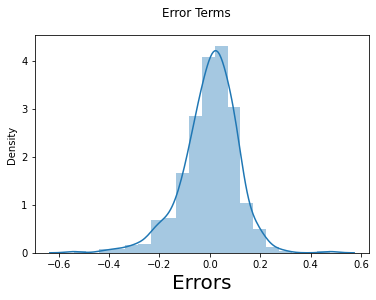

In [332]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins =20)
fig.suptitle('Error Terms', Fontsize = 30)
plt.xlabel('Errors', fontsize = 20)

**COMMENT**: By observation of distplot, the error terms are normally distributed, assumptions of linear regression is valid

**Making predictions using the final linear model_7**

***Applying the scaling on the test sets***

In [333]:
#Apply scaler() to the column as follows

num_var = ['temp','hum','windspeed','cnt']

bbikes_test[num_var] = scaler.transform(bbikes_test[num_var])
bbikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
184,0,1,0,0.818182,0.649485,0.09375,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.692706
535,1,0,1,0.909091,0.608247,0.15625,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.712034
299,0,0,0,0.515152,0.835052,0.34375,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0.303382
221,0,0,1,0.878788,0.432990,0.34375,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.547400
152,0,0,0,0.818182,0.309278,0.53125,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.569029


In [334]:
bbikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow,weathersit_Mist,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.554033,0.633950,0.315639,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.520592
std,0.500722,0.188034,0.481313,0.233272,0.148943,0.155269,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.218435
min,0.000000,0.000000,0.000000,0.030303,0.257732,-0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,0.000000,0.000000,0.000000,0.363636,0.520619,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377531
50%,0.000000,0.000000,1.000000,0.545455,0.618557,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524275
75%,1.000000,0.000000,1.000000,0.757576,0.742268,0.406250,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.672745
max,1.000000,1.000000,1.000000,0.969697,1.000000,0.781250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


Dividing into X_test and Y_test

In [335]:
#we know that the predicting variable is 'cnt' so we need to pop it out

y_test = bbikes_test.pop('cnt')
x_test = bbikes_test

In [352]:
#we need to use our model to make some predictions

#here we are creating anew dataframe by dropping variables from x_test

x_test_new = x_test[x_train_df.columns]

#adding a constant variable

x_test_new = sm.add_constant(x_test_new)


In [354]:
#predicting the variable by using linear model 7
y_pred = lr_7.predict(x_test_new)

**Model Evaluation**

Text(0, 0.5, 'y_pred')

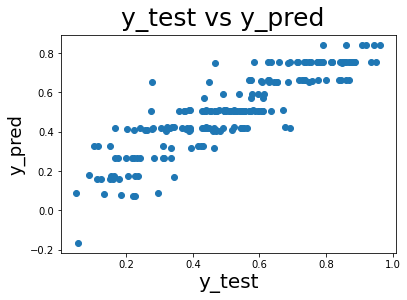

In [355]:
#Plotting y_test and y_pred scatterplot to see the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=18)


**R-squared score on the test set**

Evaluating the r_squared value by using y_test and y_pred

In [356]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.7832162861581072

**The best fitted line here is:**

**cnt = 0.5069+0.2459(yr)-0.2435(season_spring)-0.0940(mnth_Dec)-0.1034(mnth_Jan)-0.1028(mnth_Nov)+0.0862(mnth_Sept)-0.3264(weathersit_Lightsnow)-0.0886(weathersit_Mist)**

**The following analysis ca be observed from the above tests:**


*  The R2 of the test data is 0.783 or 78.3%
*  The difference between the R2 of train data and R2 of test data is 2%
*   The data is well trained as the difference between them is less than  5% only

**Final recommendations for the Company based on the results:**

*   Company should focus on expanding their business in spring season.
*   company should focus on expanding in spetember month.
*   The demand for bike decreases if it is an holiday, rain , thunderstorm and on sunday.
*   As we can see more demand for the bikes is in 2019 compared to 2018.
*   SO finally when the situation comes back to normal company should focus on giving the offers for working individuals in weekdays on pleasant days during spring season.











